# Ch02 mlfinlab 패키지 Dollar Imbalance Bars 


In [58]:
import numpy as np
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt

from numba import jit
from adv_finance import bars

In [59]:
%load_ext autoreload 
%autoreload 2

plt.style.use('seaborn-talk')
plt.style.use('bmh')
pd.set_option('display.max_rows', 100)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
# * A122630 KODEX 레버리지(ISIN: KR7122630007)
# * A252670 KODEX 200선물인버스2X(ISIN: KR7252670005)
# * A233740 KODEX 코스닥150레버리지(ISIN: KR7233740000)
# * A251340 KODEX 코스닥150선물인버스(ISIN: KR7251340006)
# * A005930 삼성전자(ISIN:KR7005930003)

TRADE_A233740 = pd.read_parquet('/nfs/data/interim/TRADE_A233740.parq').set_index('TIMESTAMP')
df = TRADE_A233740

In [7]:
df.head()

,TIMESTAMP,PRICE,BID,ASK,V,DV
0,2018-01-02 09:01:43.692,19800,-2147483648,-2147483648,60,1188000
1,2018-01-02 09:03:06.747,19800,-2147483648,-2147483648,1,19800
2,2018-01-02 09:04:56.303,19800,-2147483648,-2147483648,110,2178000
3,2018-01-02 09:13:44.671,19800,20005,20030,1,19800
4,2018-01-02 09:20:01.166,19800,19900,19940,2000,39600000


In [20]:
df0 = df[:1000000]

In [21]:
df0['PRICE'] = df0['PRICE'].astype(float)

/opt/conda/envs/python372/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
df0.to_csv('/nfs/data/interim/TRADE_A233740.csv', index=True, header=True)


In [17]:
df0 = pd.read_csv('/nfs/data/interim/TRADE_A233740.csv')

In [9]:
from mlfinlab import data_structures 

In [23]:
df1 = data_structures.get_dollar_imbalance_bars('/nfs/data/interim/TRADE_A233740.csv', num_prev_bars=1000, 
                                         exp_num_ticks_init=100, batch_size=20000)

Reading data in batches:
Batch number: 0
Batch number: 1
Batch number: 2
Batch number: 3
Batch number: 4
Batch number: 5
Batch number: 6
Batch number: 7
Batch number: 8
Batch number: 9
Batch number: 10
Batch number: 11
Batch number: 12
Batch number: 13
Batch number: 14
Batch number: 15
Batch number: 16
Batch number: 17
Batch number: 18
Batch number: 19
Batch number: 20
Batch number: 21
Batch number: 22
Batch number: 23
Batch number: 24
Batch number: 25
Batch number: 26
Batch number: 27
Batch number: 28
Batch number: 29
Batch number: 30
Batch number: 31
Batch number: 32
Batch number: 33
Batch number: 34
Batch number: 35
Batch number: 36
Batch number: 37
Batch number: 38
Batch number: 39
Batch number: 40
Batch number: 41
Batch number: 42
Batch number: 43
Batch number: 44
Batch number: 45
Batch number: 46
Batch number: 47
Batch number: 48
Batch number: 49
Returning bars 



In [27]:
df1 = df1.set_index('date_time')

In [32]:
parq_file = f'/nfs/data/interim/TRADE_A233740_imb_bars.parq'
df1.to_parquet(parq_file)

In [33]:
df2 = pd.read_parquet(parq_file)

In [37]:
df_imb_bars = df1

In [39]:
df_price = df.loc[:'2018-01-19']

In [36]:
df1.tail()

,open,high,low,close,volume
date_time,,,,,
2018-01-19 14:42:03,25815.0,25815.0,25815.0,25815.0,500
2018-01-19 14:42:03,25815.0,25815.0,25810.0,25810.0,617
2018-01-19 14:42:03,25810.0,25810.0,25810.0,25810.0,610
2018-01-19 14:42:03,25810.0,25810.0,25810.0,25810.0,1682
2018-01-19 14:42:04,25810.0,25810.0,25805.0,25810.0,1205


In [42]:
df1['PRICE'] = df1.close

In [46]:
df_price.head()

,PRICE,V
TIME,,
2018-01-02 09:01:43,19800,60
2018-01-02 09:03:06,19800,1
2018-01-02 09:04:56,19800,110
2018-01-02 09:13:44,19800,1
2018-01-02 09:20:01,19800,2000


In [50]:
df_imb_bars1 = df_imb_bars.reset_index()[['date_time', 'PRICE']]

In [51]:
df_imb_bars1.columns = ['TIME', 'PRICE']

In [53]:
df_imb_bars1 = df_imb_bars1.set_index('TIME')

In [58]:
df_imb_bars1 = df_imb_bars1.reset_index()

In [64]:
df_imb_bars1.TIME = pd.DatetimeIndex(df_imb_bars1.TIME)

In [65]:
df_imb_bars1 = df_imb_bars1.set_index('TIME')

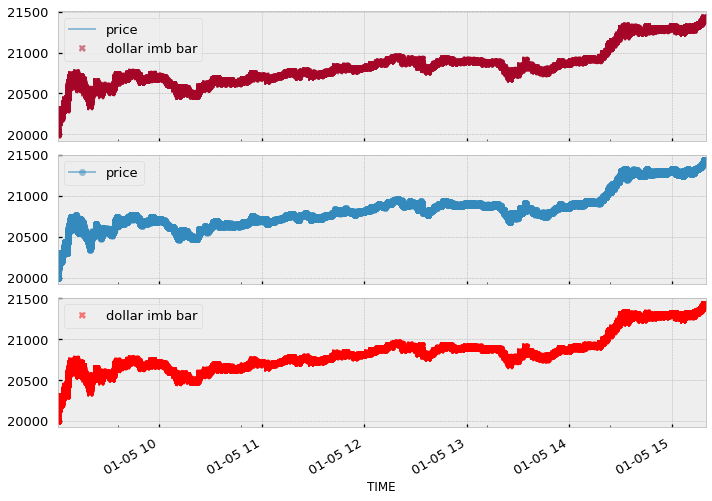

In [68]:

xDate = '2018-01-05'
xdf, xtdf = bars.select_sample_data(df_price, df_imb_bars1, 'PRICE', xDate)
bars.plot_sample_data(xdf, xtdf, 'dollar imb bar', alpha=0.5, markersize=7)   


In [69]:
df_price.shape

(1014107, 2)

In [70]:
df_imb_bars1.shape

(429441, 1)

In [78]:
df0.values[0]

array([19800.,    60.])

In [53]:
@jit(nopython=True)
def numba_isclose(a,b,rel_tol=1e-09,abs_tol=0.0):
    return np.fabs(a-b) <= np.fmax(rel_tol*np.fmax(np.fabs(a), np.fabs(b)), abs_tol)

@jit(nopython=True)
def get_signed_ticks_jit(t): 
    bs = t
    bs[0] = 1
    for i in np.arange(1, bs.shape[0]): 
        if numba_isclose(bs[i], 0.0):
            bs[i] = bs[i-1]
    return bs
    

def get_signed_ticks(prices): 
    """
    Applies the tick rule as defined on page 29.
    
    : param prices: numpy array of price
    : return: the singed tick array 
    
    """
    return get_signed_ticks_jit(np.sign(np.diff(prices)))


def get_imbalance_ticks(df, metric): 
    prices = df.PRICE.values
    signed_ticks = get_signed_ticks(prices)
    
    if metric == "tick_imbalance": 
        imb_ticks = signed_ticks
    elif metric == "dollar_imbalance": 
        imb_ticks = signed_ticks * df.DV.values[1:]
    else: 
        imb_ticks = signed_ticks * df.V.values[1:]
    
    return imb_ticks


def agg_imbalance_bars(imb_arr, tm_arr, data_arr): 
    """
    : param tm_arr: Timestamp array 
    : param data_arr: Contains 2 columns - [PRICE, V]
    """
    
    n_imb_ticks = len(imb_ticks)
    cum_ticks, cum_theta, cum_vol = 0, 0, 0
    high_price, low_price = -np.inf, np.inf

    for i in np.arange(n_imb_ticks):
        tm = tm_arr[i]
        price = data_arr[i][0]
        vol = data_arr[i][1]
        imbalance = imb_arr[i]
        
        # update high/low_price
        if price > high_price:
            high_price = price

        if price <= low_price:
            low_price = price

        cum_ticks += 1
        cum_vol += vol
        cum_theta += imbalance
        
        
            
        # imbalance calculation
        
        print(i, tm, imb_ticks[i], price, vol)
        
        



In [54]:
df.head()

,PRICE,BID,ASK,V,DV
TIMESTAMP,,,,,
2018-01-02 09:01:43.692,19800,-2147483648,-2147483648,60,1188000
2018-01-02 09:03:06.747,19800,-2147483648,-2147483648,1,19800
2018-01-02 09:04:56.303,19800,-2147483648,-2147483648,110,2178000
2018-01-02 09:13:44.671,19800,20005,20030,1,19800
2018-01-02 09:20:01.166,19800,19900,19940,2000,39600000


In [55]:
tm_arr = df.index.values[1:]
data_arr = df[['PRICE', 'V']].values[1:]
agg_imbalance_bars(imb_ticks[:10], tm_arr[:10], data_arr[:10])

0 2018-01-02T09:03:06.747000000 19800 19800 1
1 2018-01-02T09:04:56.303000000 2178000 19800 110
2 2018-01-02T09:13:44.671000000 19800 19800 1
3 2018-01-02T09:20:01.166000000 39600000 19800 2000
4 2018-01-02T10:00:03.348000000 4272842880 19980 213856
5 2018-01-02T10:00:03.349000000 39970000 19985 2000
6 2018-01-02T10:00:03.349000000 -1758240 19980 88
7 2018-01-02T10:00:03.349000000 119910000 19985 6000
8 2018-01-02T10:00:03.730000000 1998500 19985 100
9 2018-01-02T10:00:03.730000000 19985000 19985 1000


In [23]:
%%time 
imb_ticks = get_imbalance_ticks(df, "dollar_imbalance")

CPU times: user 486 ms, sys: 108 ms, total: 594 ms
Wall time: 594 ms


In [25]:
imb_ticks.shape

(11945992,)

In [26]:
df.shape

(11945993, 5)

In [70]:
%%timeit
for i, v in zip(df.index[:1000000], df.values[:1000000]):
    (i, v)

4.3 s ± 11.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [72]:
%%timeit
for i, v in enumerate(df.values[:1000000]): 
    (df.index[i], v)

6.5 s ± 28.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [54]:
df.index[0]

Timestamp('2018-01-02 09:01:43.692000')

In [53]:
df.values[0]

array([      19800, -2147483648, -2147483648,          60,     1188000])

In [60]:
TRADE_A252670 = pd.read_parquet('/nfs/data/interim/TRADE_A252670.parq')

In [62]:
TRADE_A252670.to_csv('/nfs/data/interim/TRADE_A252670.csv', header=True, index=False)

In [65]:
tm_arr = df.index.values

In [68]:

tm_arr.astype(int)

array([1514883703692000000, 1514883786747000000, 1514883896303000000, ...,
       1546010396329000000, 1546010396950000000, 1546010397675000000])